# =========78일(5월7일/금) 2교시 ==========
- 수업 : 
- 복습 : 



- 윤곽선만 뽑아도 대략 이 물체가 어떤 물체인지 구분될수 있다. 엣지를 검출해보자. 

# 엣지검출 (Edge Detection)

- 엣지(edge)
    - 배경과 물체 또는 물체와 물체간의 경계를 말한다.
- 엣지 검출
    - 엣지는 경계가 되는 부분으로 픽셀값이 급격하게 변하게 되므로 그 변화되는 픽셀들을 찾아낸다.
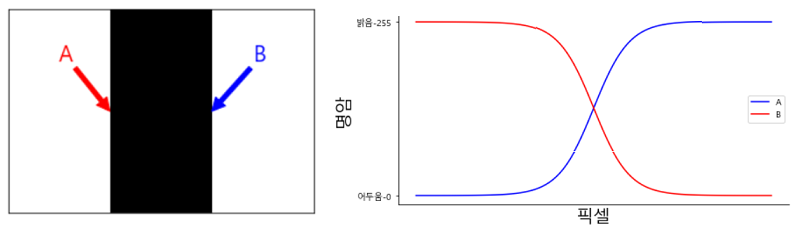
   
   - 엣지 검출을 통해 물체들의 윤곽만 남기고 필요없는 물체나 배경은 제거할 수 있다.
   - Edge detection은 noise의 영향을 많이 받아 일반적으로 blur를 수행 한 후에 Edge detection을 수행

### 엣지 검출과 미분
- 픽셀값의 차이가 큰 부분을 엣지로 판단 하므로 연속된 픽셀값에 미분을 해서 찾아낸다.  
- 그러나 영상의 픽셀값들은 특정 함수에 의해 구해진 값들이 아니므로 미분 근사값을 이용해 구해야 한다.

#### 1차 미분의 근사화
- 전진 차분(Forward difference)
    - $\cfrac{\partial{f}}{\partial{x}}\;\cong\;\cfrac{f(x+h) - f(x)}{h}$
- 후진 차분(Backward difference)
    - $\cfrac{\partial{f}}{\partial{x}}\;\cong\;\cfrac{f(x) - f(x-h)}{h}$
- 중앙 차분(Centered difference)
    - $\cfrac{\partial{f}}{\partial{x}}\;\cong\;\cfrac{f(x+h) - f(x-h)}{2h}$
- 엣지 검출에서는 **중앙 차분**을 사용하며 **h(X의 변화)은 픽셀을 말하며** 이전 픽셀 또는 이후 픽셀과의 차이를 확인하는 것이므로 1로 볼 수 있다. 그러나 우리는 변화율을 보는 것이 목적이므로 1/2로 곱하는 것은 하지 않는다.
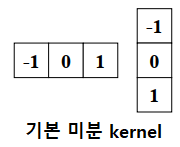

- 주요 미분 커널
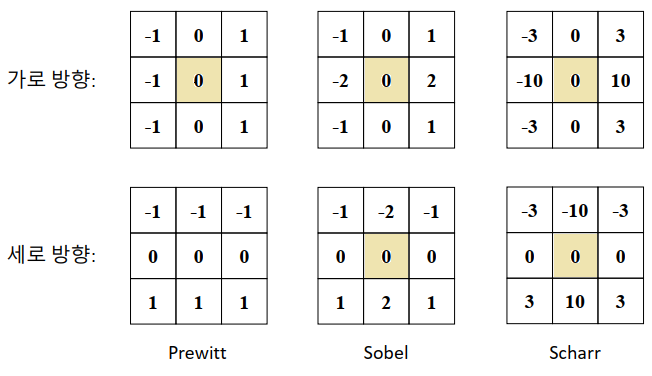

#### 소벨 필터 직접 만들어서 적용

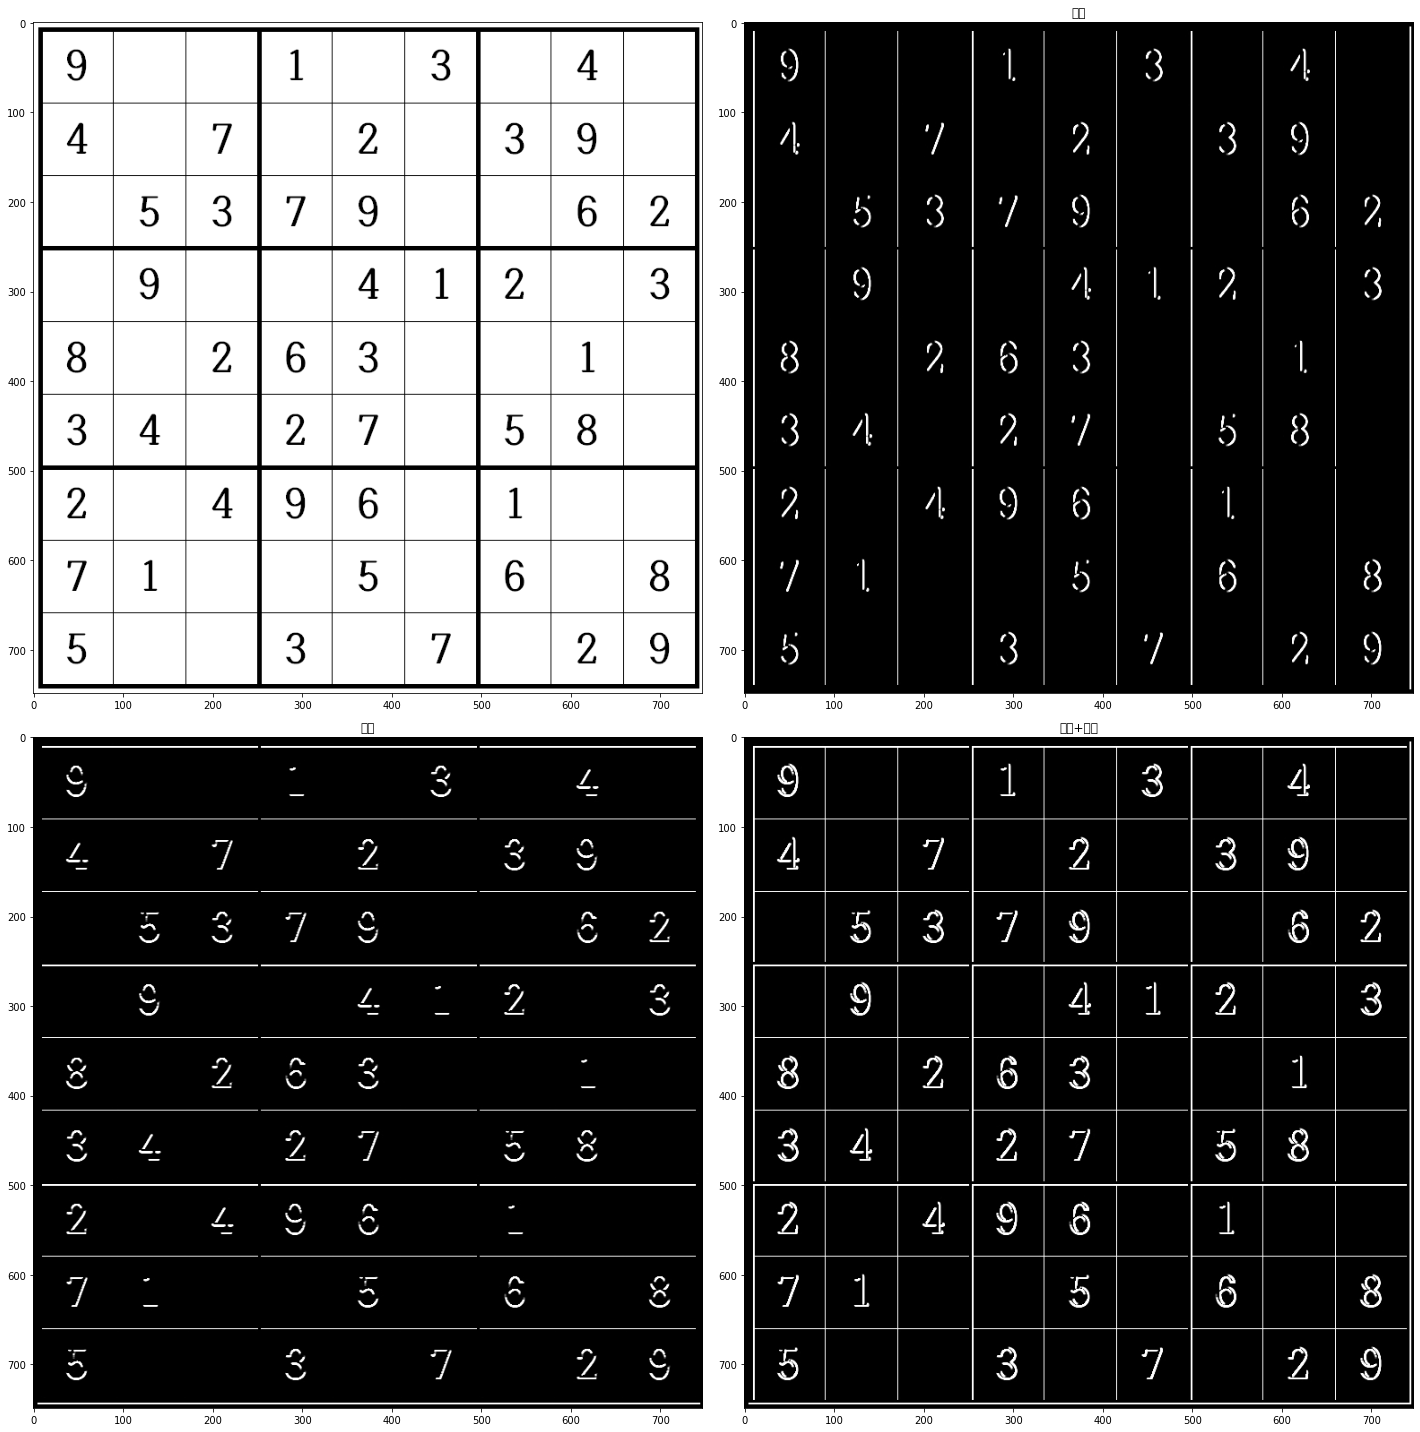

In [9]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

sudoku = cv2.imread('./images/sudoku.jpg', cv2.IMREAD_GRAYSCALE)
sudoku.shape # (749, 747)

# SOBEL 필터(커널) 생성 
kernel_x = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
kernel_y = np.array([[-1,-2,-1],[0,0,0],[1,2,1]])

x_edge = cv2.filter2D(sudoku, -1, kernel_x) # -1 : 출력결과의 타입으로 입력과 동일한 타입으로 지정하겠다. 
y_edge = cv2.filter2D(sudoku, -1, kernel_y) 
edge = cv2.add(x_edge, y_edge)

plt.figure(figsize=(20,20))
row, col = 2, 2
plt.subplot(row, col, 1)
plt.imshow(sudoku, cmap='gray')

plt.subplot(row, col, 2)
plt.imshow(x_edge, cmap='gray')
plt.title('가로') # 가로방향으로 엣지를 확인

plt.subplot(row,col,3)
plt.imshow(y_edge, cmap='gray')
plt.title('세로') # 세로방향으로 엣지를 확인 

plt.subplot(row,col,4)
plt.imshow(edge, cmap='gray')
plt.title('가로+세로') # 가로+세로 둘다 합해서 

plt.tight_layout()
plt.show()

- 가로세로 합한거를 보니 두께가 두껍게 나오고, 2줄 이렇게 된것도 있고 좀더 다듬을 필요가 있는건가? 
- 

### sobel 함수 이용
- **`cv2.Sobel(src, ddepth, dx, dy, ksize, scale, delta)`**
    - src: 엣지를 검출할 영상
    - ddepth: 출력 영상의 타입. -1로 지정하면 입력영상과 같은 타입 사용.
    - dx, dy: x/y 방향 미분의 차수
        - dx=1, dy=0 : 가로방향
        - dx=0, dy=1 : 세로방향
    - ksize: 커널의 크기. 보통 3으로 준다.
    - scale: 연산결과에 추가적으로 곱할값. Default: 1
    - delta: 연산결과에 추가적으로 더할값. Default: 0
- **`cv2.magnitude(x, y)`**
    - x방향, y방향 필터 결과(미분결과)를 합치는 함수
    - x: x방향 미분 결과
    - y: y방향 미분 결과

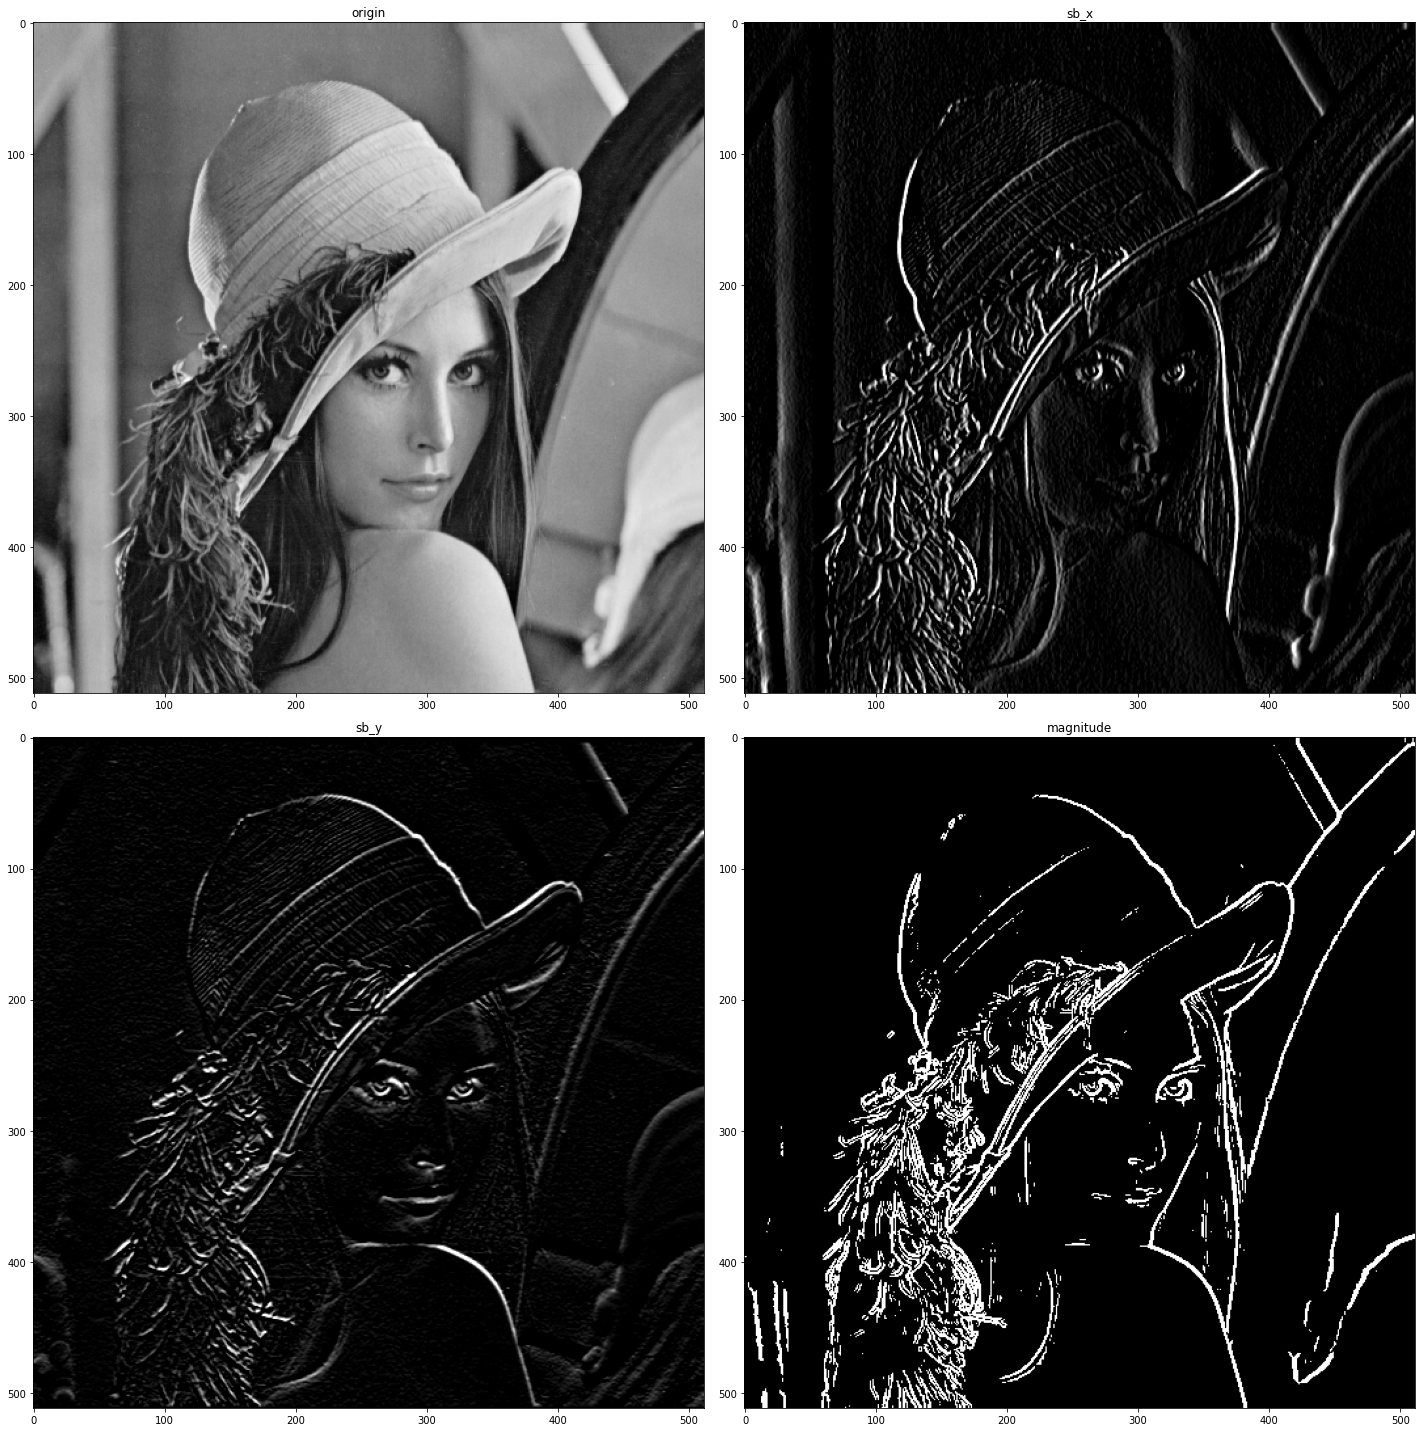

In [29]:
lenna = cv2.imread('./images/lenna.bmp', cv2.IMREAD_GRAYSCALE)

# cv2.Sobel(src, ddepth, dx, dy, ksize, scale, delta)
# sb_x = cv2.Sobel(lenna, -1, dx=1, dy=0, ksize=3, scale=1)#, delta=128) # -1 로 출력 : uint8 
# sb_y = cv2.Sobel(lenna, -1, dx=0, dy=1, ksize=3, scale=1)#, delta=128)

# x,y를 합쳐보자 
sb_x = cv2.Sobel(lenna, cv2.CV_32F, 1, 0, ksize=3) # cv2.CV_32F : float32로 출력하라 (0-255로 수렴하지 않는다. ) 
sb_y = cv2.Sobel(lenna, cv2.CV_32F, 0, 1, ksize=3)
mag = cv2.magnitude(sb_x, sb_y)

# 이작업은 보기위해서 하는 작업 
edge_x = np.clip(sb_x, 0, 255).astype(np.uint8)
edge_y = np.clip(sb_y, 0, 255).astype(np.uint8)
edge = np.clip(mag, 0, 255).astype(np.uint8)

# 윤곽석은 좀더 뚜렷하게 해보자 
edge = np.zeros_like(mag) # mag shape에 0으로 채운 값 
threshold = 140 # 임계점을 100으로 정해보자 
edge[mag > threshold] = 255 # 픽셀값이 임계점(100)초과인 것을 255로하고 나머지는 0으로 채운다. 

plt.figure(figsize=(20,20))
row, col = 2,2 

plt.subplot(row, col, 1)
plt.imshow(lenna, cmap='gray')
plt.title('origin')

plt.subplot(row, col, 2)
plt.imshow(edge_x, cmap='gray')
plt.title('sb_x')

plt.subplot(row, col, 3)
plt.imshow(edge_y, cmap='gray')
plt.title('sb_y')

plt.subplot(row, col, 4)
plt.imshow(edge, cmap='gray')
plt.title('magnitude')

plt.tight_layout()
plt.show()

In [21]:
np.min(mag), np.max(mag), np.min(sb_x), np.max(sb_x)

(0.0, 709.074, -688.0, 640.0)

>- sb_x, sb_y 기본만 했을때 한계 
- x방향일때는 밝은곳에서 어두워지는 부분은 표시가 잘되지만, 어두워지다가 밝은곳은 음수로 되면서 표시가 잘안된다. 오른쪽 윗부분 조형물 
- y방향에서는 기둥이 거의 표시가 되지 않는다. 
- 그래서 기준점을 표시해보자 -> 델타를 128로 변경 --> 배경이 회색끼가 돈다 
- 엣지는 경계만 나와야 하는데 기둥 옆보면 자글자글 , 모자무늬들 ==> 농도의 변화가 되는 부분들 까지 표현이되었다.
- 우리가 찾으려는 것은 윤곽선만 찾고싶은것. 위에 부분은 뺏으면 좋겠다. 
- 그리고 x,y방향을 합쳐줘야 한다. 

>-  magitude 하기위해선?
- sv2.SV_32F 처리해줘야함 
- 왜? cv_32F ? 매그니튜드로 합칠것 이기때문에 실수로 처리하기 위해서


- 한계점1) x, y 두개 합해야 한다. 
- 한계점2) 윤곽선만 나오지 않는다. 잡음문제
    - 윤곽선이 뚜렷한 부분은 흰색이 밝다. 면쪽에 표시된 부분은 필요없는 부분이며 윤곽선이 뚜렷하지 못해 흰색이 밝지 못하다 --> 임계점으로 제한을 둬서 없애자 
- 한계점3) 윤곽만 찾음면 되는데 두께조절이 안된다. 

이를 해결하기 위해서 나온게 캐니 

### Canny
- Noise에 강한 edge detection
1. Gaussian blur를 수행해 noise를 제거
2. x, y축으로 gradient 계산
3. Gradient 의 방향을 계산 후 sobel filtering
4. Non-Maximum Suppession(NMS) 수행해서 엣지가 두꺼워지는 것을 방지
    - 주위(local)에서 가장 큰 값들만 남긴다.
5. Doubling thresholding
    - low threshold, high threshold를 기준으로 값들 제거
    - low threshold 이하의 값들 제거
    - low와 high threshold 사이의 값들은 high threshold와 연결된 것만 남기고 연결 안된것은 제거
        - 약한 edge
    - high threshold 이상의 값들은 유지
        - 강한 edge
        
     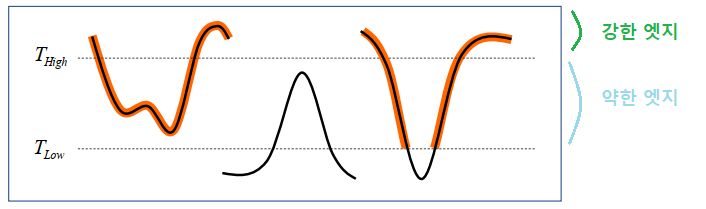

- `cv2.Canny(image, threshold1, threshold2, apertureSize=None)`
    - image: Canny 엣지 검출을 할 원본 이미지
    - threshold1: low threshold
    - threshold2: high threshold
        - threshold1과 threshold2 는 1:2 또는 1:3 정도 비율로 준다.
    - apertureSize: 소벨필터의 커널크기. default: 3

In [ ]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt

lenna = cv2.imread('./images/lenna.bmp', cv2.IMREAD_GRAYSCALE)
lenna = cv2.imread('./images/building.jpg', cv2.IMREAD_GRAYSCALE)

# cv2.Canny(image, threshold1, threshold2, apertureSize=None) 
canny_img = cv2.Canny(lenna, 50, 150) # low(50) , high(150)
canny_img2 = cv2.Canny(lenna, 100, 200)

# cv2.imshow('canny', canny_img)
cv2.imshow('origin', lenna)
cv2.imshow('canny2', canny_img2)
cv2.waitKey(0)
cv2.destroyAllWindows()

- 선이 뚜렷하고, 선이 끊기는게 없다. 
- 